# Dataset

**Load Dataset**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

df = pd.read_csv('https://raw.githubusercontent.com/RizkiYanuar-Tech/Datasets/main/HeartDisease.csv')

**Feature Encoding 10 fitur baru**

In [15]:
from sklearn.preprocessing import LabelEncoder

#set encoder
encoder = LabelEncoder()

#apply
df_label_encoded = df.copy()
df_label_encoded['Kategori Usia'] = encoder.fit_transform(df["Kategori Usia"])
df_label_encoded['Kategori Cholesterol'] = encoder.fit_transform(df["Kategori Cholesterol"])
df_label_encoded['Kategori Rasio'] = encoder.fit_transform(df["Kategori Rasio"])
df_label_encoded['Hyperglycemia'] = encoder.fit_transform(df["Hyperglycemia"])
df_label_encoded['Angina'] = encoder.fit_transform(df["Angina"])
df_label_encoded['Kategori Pembuluh Darah'] = encoder.fit_transform(df["Kategori Pembuluh Darah"])
df_label_encoded['Kategori Tekanan Darah'] = encoder.fit_transform(df["Kategori Tekanan Darah"])
df_label_encoded['Kategori Depression'] = encoder.fit_transform(df["Kategori Depression"])

df_label_encoded

,age,Kategori Usia,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,...,Kategori Cholesterol,Rata-Rata Tekanan Darah,Rasio_chol_BP,Kategori Rasio,Hyperglycemia,Angina,Kategori Pembuluh Darah,Kategori Tekanan Darah,Kategori Depression,target
0,52,1,1,0,125.0,212.0,0,1,168.0,0,...,0,63.00,1.696000,1,1,1,1,0,1,0
1,53,1,1,0,140.0,203.0,1,0,155.0,1,...,0,71.55,1.450000,1,0,0,4,0,0,0
2,70,1,1,0,145.0,174.0,0,1,125.0,1,...,1,73.80,1.200000,1,1,0,4,0,2,0
3,61,1,1,0,148.0,203.0,0,1,161.0,0,...,0,74.00,1.371622,1,1,1,0,0,3,0
4,62,1,0,0,138.0,294.0,1,1,106.0,0,...,2,69.95,2.130435,1,0,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,1,0,2,120.0,211.0,0,0,115.0,0,...,0,60.75,1.758333,1,1,1,4,1,2,1
298,44,0,0,2,108.0,141.0,0,1,175.0,0,...,1,54.30,1.305556,1,1,1,4,1,1,1
299,52,1,1,0,128.0,255.0,0,1,161.0,1,...,2,64.00,1.992188,1,1,0,0,0,3,0
300,59,1,1,3,160.0,273.0,0,0,125.0,0,...,2,80.00,1.706250,1,1,1,4,0,3,0


In [16]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

# **Definisi Variable**

In [17]:
#Definisi variable
X = df.iloc[:,:-1]
y = df['target']

# **Split data into datatest and data train**

In [18]:
from sklearn.model_selection import train_test_split

#Split dataset into data test and data train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KNN

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#Model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

accuracy_train = accuracy_score(y_train_predict, y_train)
accuracy_test = accuracy_score(y_test_predict, y_test)

print("Accuracy latih: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

Accuracy latih:  0.7759336099585062
Accuracy test:  0.639344262295082


**Learning Curves**

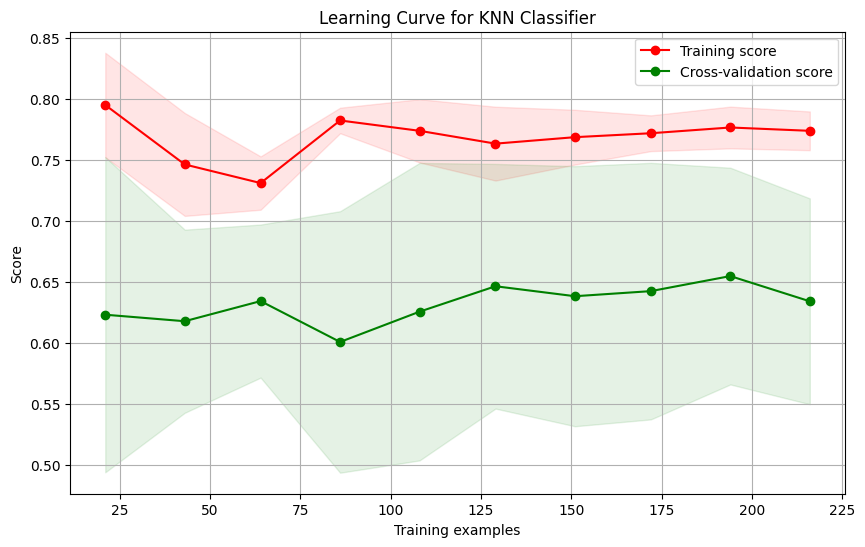

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for KNN Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

**Hyperparameter tuning with gridsearchcv on KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_neighbors'      : [1, 3, 5, 7],
     'weights'          : ['uniform', 'distance'],
     'metric'           : ['euclidean', 'manhattan', 'minkowski'],
     'algorithm'        : ['ball_tree', 'auto', 'kd_tree']
}

grid_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, scoring = 'accuracy', n_jobs = 2)
grid_knn.fit(X_train, y_train)

#parameter & score terbaik
best_params = grid_knn.best_params_

print("Parameter terbaik: ", best_params)

#Evaluasi model menggunakan parameter terbaik pada data test
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
knn_test = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, knn_test)
print("Akurasi setelah menggunakan GridSearch: ", accuracy)

Parameter terbaik:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Akurasi setelah menggunakan GridSearch:  0.6557377049180327


**Metric Evaluation**

In [ ]:
#Panggil library confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_predict = knn.predict(X_test)

#Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

#Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  KFold

#Inisialisasi model yang akan dievaluasi
knn = KNeighborsClassifier(n_neighbors = 5)

#Inisialisasi metode cross-validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

#Evaluasi model menggunakan cross-validation
scores = cross_val_score(knn, X, y, cv = kfold)

print("Cross-Validation Scores: ",  scores)
print("Mean Accuracy:",  scores.mean())

Cross-Validation Scores:  [0.76       0.70833333 0.5        0.375      0.79166667 0.75
 0.66666667 0.54166667 0.58333333 0.75      ]
Mean Accuracy: 0.6426666666666667


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#used to devide
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

accuracy_train = accuracy_score(y_train_predict, y_train )
accuracy_test = accuracy_score(y_test, y_test_predict)

print("Accuracy latih: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

print(classification_report(y_test, y_test_predict))

Accuracy latih:  1.0
Accuracy test:  0.8688524590163934
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



**Boostraping**

In [21]:
from sklearn.utils import resample

#Implements Boostraping
n_boostrap = 50
boostrap_score = []

for i in range(n_boostrap):
  X_boostrap, y_boostrap = resample (X, y, replace = True, random_state = i)

  #Split dataset into data test and data train
  X_train, X_test, y_train, y_test = train_test_split(X_boostrap, y_boostrap, test_size = 0.2, random_state = 42)

  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  boostrap_score.append(acc)

print("Boostrap score: ", boostrap_score)
print("Average: ", np.mean(boostrap_score))

Boostrap score:  [0.9508196721311475, 0.8688524590163934, 0.9016393442622951, 0.9016393442622951, 0.9508196721311475, 0.9016393442622951, 0.8688524590163934, 0.9508196721311475, 0.9016393442622951, 0.9016393442622951, 0.9180327868852459, 0.8852459016393442, 0.8688524590163934, 0.8524590163934426, 0.8852459016393442, 0.9180327868852459, 0.9836065573770492, 0.9508196721311475, 0.8852459016393442, 0.9836065573770492, 0.9016393442622951, 0.9344262295081968, 0.9508196721311475, 0.9344262295081968, 0.9016393442622951, 0.9180327868852459, 0.9836065573770492, 0.8852459016393442, 0.9836065573770492, 0.9672131147540983, 0.9016393442622951, 0.9344262295081968, 0.9508196721311475, 0.9180327868852459, 0.9016393442622951, 0.9344262295081968, 0.9016393442622951, 1.0, 0.9672131147540983, 0.9016393442622951, 0.8688524590163934, 0.8852459016393442, 0.8524590163934426, 0.9672131147540983, 0.9836065573770492, 0.9180327868852459, 0.9508196721311475, 0.9344262295081968, 0.9016393442622951, 0.901639344262295

**Learning Curves**

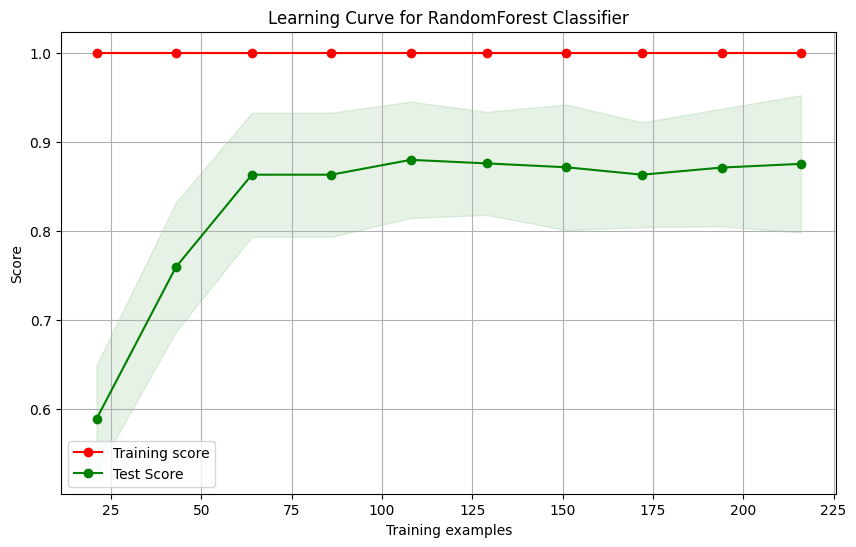

In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Test Score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for RandomForest Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

*  Training Score = 1, menunjukkan bahwa model mempelajari data training dengan sempurna
*  Test Score = 0.87, menunjukkan bahwa model melakukan prediksi terhadap data baru cukup bagus dengan graphic terlihat selalu terjadi peningkatan walaupun terjadi sejumlah penurunan akurasi yang tidak terlalu signifikan

> Secara keseluruhan learning curves model random forest ini menghasilkan learning curves yang good fit, karena pada data testing selalu terjadi peningkatan walaupun gap antara akurasi data training dan akurasi data testing agak jauh





**Hyperparameter Tuning On RandomForest**

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_estimators'      : [100, 200, 300],
     'criterion'         : ['entropy','gini'],
     'max_depth'         : [10, 20, 30],
     'min_samples_split' : [2, 5 , 10],
     'min_samples_leaf'  : [1, 2, 4]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, scoring = 'accuracy', n_jobs = 2)
grid_search.fit(X_train, y_train)

#parameter & score terbaik
best_params = grid_search.best_params_

print("Parameter terbaik: ", best_params)

#Evaluasi model menggunakan score dan parameter terbaik pada data test
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)
rf_test = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_test)
print("Akurasi setelah menggunakan GridSearch: ", accuracy)

Parameter terbaik:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Akurasi setelah menggunakan GridSearch:  0.95


**Metric Evaluation**

ukuran yang digunakan untuk mengevaluasi kinerja model machine learning, beberapa contoh:
*   Precision = membandingkan hasil prediksi positif dengan yang positif sebenarnya
*   Recall = kemampuan model untuk bisa memprediksi positif dari seluruh data

*   F1-Score = Rata-rata dari Precision dan recall
*   Accuracy = Persentase prediksi benar dari total prediksi

*   ROC Curve(Receiver Operating Characteristic Curve) = Grafik yang menunjukkan kinerja model pada berbagai tingkat cutoff. Ini digunakan untuk mengevaluasi kinerja model klasifikasi di berbagai threshold dan mengukur AUC (Area Under the Curve) untuk memberikan ukuran keseluruhan dari kinerja model.
  
*   AUC (Area Under Curve) = Ukuran secara keseluruhan dari kinerja model dalam mengklasifikasi, model dengan score AUC = 1 memiliki kinerja yang lebih baik dalam mengklasifikasi

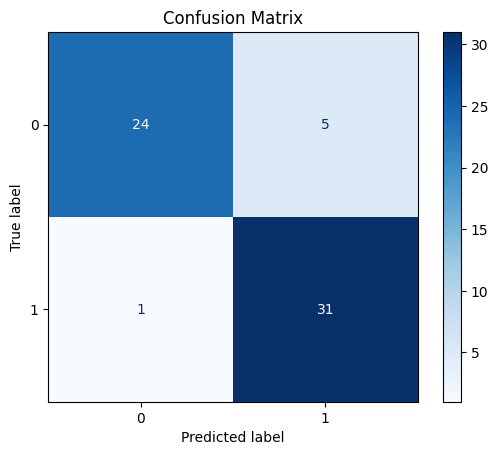

In [24]:
#Panggil library confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_predict = rf.predict(X_test)

#Inisialisasi confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

#Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Confusion Matrix
1 = positive
0 = negative

*   True Positive = 31 data actual (positive) dan data prediksi (positive)
*   True Negative = 24 data actual (Negative) dan data prediksi (negative)
*   False Negative = 5 data actual (Negative) dan data prediksi (positive)
*   False Positive = 1 data actual (Positive) dan data prediksi (negative)



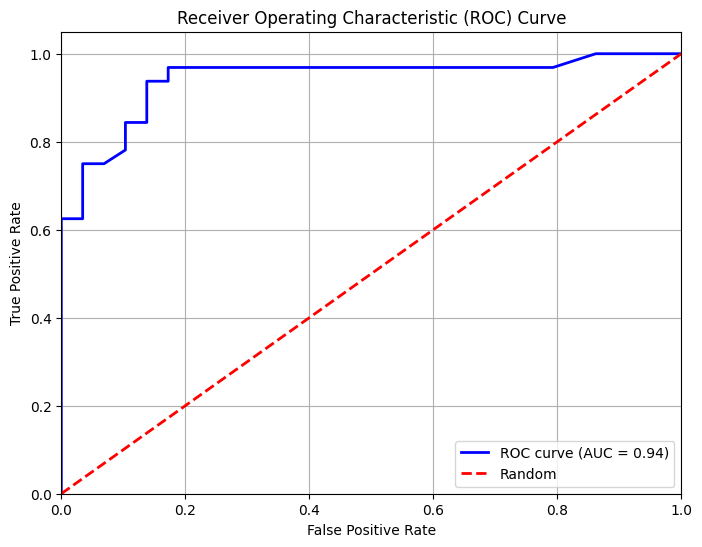

In [28]:
#Generate ROC Curve
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [29]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        29
           1       0.86      0.97      0.91        32

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



Pada metric evaluation didapat hasil:
*   Precision = kelas 0 (0,96) dan kelas 1 (0,86) menggambarkan precision relatif tinggi dalam mengidentifikasi kelas dimana 0.96 berhasil mengidentifikasi kelas 0 yang True Positif, 0.86 berhasil mengidentifikasi kelas 1 yang True Positif

*  Recall = Pada persentase recall didapatkan bahwa kelas 0 mampu memprediksi kelas yang benar sebesar 0.83 dari keseluruh data, sedangkan kelas 1 relatif tinggi dengan hasil prediksi kelas yang benar sebesar 0.97 dari keseluruh data

*   F1-Score = 0,89 berarti model memiliki keseimbangan yang cukup baik antara recall dan precision

*  Akurasi = 0.90 menggambarkan bahwa model mampu memprediksi hasil benar dari keseluruhan total prediksi
*   ROC-AUC curve = menunjukkan bahwa model dapat membagi antara true positive rate dengan false positive rate dengan baik




**CROSS VALIDATION**

adalah suatu teknik yang digunakan untuk mengevaluasi kinerja dari suatu model. Teknik ini membantu mengukur seberapa baik model akan berkinerja pada data yang tidak terlihat atau data baru.



In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  KFold
from sklearn.ensemble import RandomForestClassifier

#Inisialisasi model yang akan dievaluasi
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

#Inisialisasi metode cross-validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

#Evaluasi model menggunakan cross-validation
scores = cross_val_score(rf, X, y, cv = kfold)

print("Cross-Validation Scores: ",  scores)
print("Mean Accuracy:",  scores.mean())

Cross-Validation Scores:  [0.83870968 0.87096774 0.83333333 0.83333333 0.8        0.9
 0.83333333 0.86666667 0.83333333 0.8       ]
Mean Accuracy: 0.840967741935484


dilakukan pembagian sebanyak 10 fold, dimana setiap fold menghasilkan akurasi antara 0.8 sampai 0.9 dengan rata-rata hasil akurasi 0.84096

Hasil tersebut sudah menggambarkan model cenderung memberikan prediksi yang benar pada sebagian besar data uji yang digunakan dalam cross-validation.

# Support Vector Machine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

#Model SVM
svm_classifier = svm.SVC(random_state = 42)
svm_classifier.fit(X_train, y_train)

svm_train = svm_classifier.predict(X_train)

#predict hasil untuk data testing
svm_test =  svm_classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, svm_train)
accuracy_test = accuracy_score(y_test, svm_test)

print("Accuracy latih: ", accuracy_train)
print("Accuracy test: ", accuracy_test)

print(classification_report(y_test, svm_test))

Accuracy latih:  0.6763485477178424
Accuracy test:  0.5737704918032787
              precision    recall  f1-score   support

           0       0.69      0.34      0.46        32
           1       0.53      0.83      0.65        29

    accuracy                           0.57        61
   macro avg       0.61      0.59      0.55        61
weighted avg       0.61      0.57      0.55        61



**Learning Curves SVM**

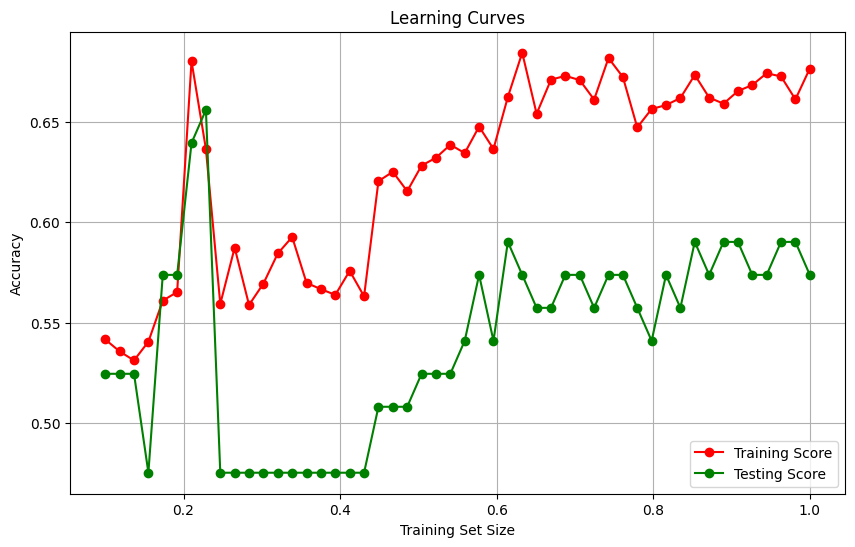

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for KNN Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()

**Hyperparameter Tuning Using GridSearch for SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV

#parameter grid to search
param_grid = [
    {'C'     : [1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly'],
    'gamma'  : [0.001, 0.0001]}
]

#SVM model
svm_classifier = svm.SVC(random_state = 42)

#Create GridSearchCV instance
grid_search = GridSearchCV(estimator = svm_classifier, param_grid = param_grid, cv = 10)

#Cari parameter terbaik
grid_search.fit(X_train, y_train)

#parameter & score terbaik
best_params = grid_search.best_params_

print("Parameter terbaik: ", best_params)

#Evaluasi model menggunakan score dan parameter terbaik pada data test
best_svm = svm.SVC(**best_params)
best_svm.fit(X_train, y_train)
svm_test = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_test)
print("Akurasi setelah menggunakan GridSearch: ", accuracy)

KeyboardInterrupt: 

**Metric Evaluation**

In [ ]:
#Panggil library confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svm_test = svm_classifier.predict(X_test)

#Inisialisasi confusion matrix
cm = confusion_matrix(y_test, svm_test)

#Tampilkan confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm_classifier.classes_)
display.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  KFold
from sklearn.svm import SVC

#Inisialisasi model yang akan dievaluasi
svm_classifier = svm.SVC(random_state = 42)

#Inisialisasi metode cross-validation
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

#Evaluasi model menggunakan cross-validation
scores = cross_val_score(svm_classifier, X, y, cv = kfold)

print("Cross-Validation Scores: ",  scores)
print("Mean Accuracy:",  scores.mean())

Cross-Validation Scores:  [0.64516129 0.5483871  0.73333333 0.5        0.63333333 0.8
 0.73333333 0.63333333 0.7        0.7       ]
Mean Accuracy: 0.6626881720430108
